# Libraries

In [94]:
from PIL import Image
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt

# Load Image

In [8]:
def load_image(path):
    image = Image.open(path)
    return np.asarray(image)

# K-Means

In [118]:
def k_means(data, k, number_iterations):
    n = len(data)
    centers = []

    # initialize centers
    random_list = random.sample(range(0, n), k)

    for i in random_list:
        centers.append(data[i])

    for iteration in range(number_iterations):
        # Find cluster of each points
        c_list = []
        for i in range(n):
            best_distance = math.inf
            best_cluster = -1
            for j in range(k):
                distance = np.linalg.norm(data[i]-centers[j])
                if distance < best_distance:
                    best_distance = distance
                    best_cluster = j
            c_list.append(best_cluster)

        centers = []
        # Calculate new centers
        for j in range(k):
            data_class = []

            for i in range(n):
                if c_list[i] == j:
                    data_class.append(data[i])
                    
            centers.append(np.mean(data_class, axis=0))

    return c_list, centers

In [119]:
def reconstruct(c_list, centers, data_img_shape):
    data_reconstructed = []

    for i in range(len(c_list)):
        data_reconstructed.append(centers[c_list[i]])

    data_reconstructed = np.array(data_reconstructed)

    data_img_reconstructed = data_reconstructed.reshape(data_img_shape)
    
    data_img_reconstructed = data_img_reconstructed.astype(int)
    
    return data_img_reconstructed

# Run

k=2
k=3
k=4
k=5
k=6
k=10
k=15
k=20


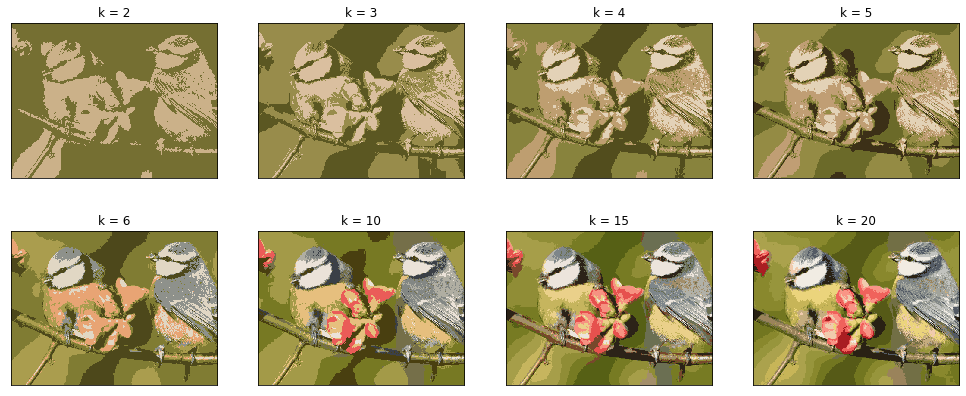

k=2
k=3
k=4
k=5
k=6
k=10
k=15
k=20


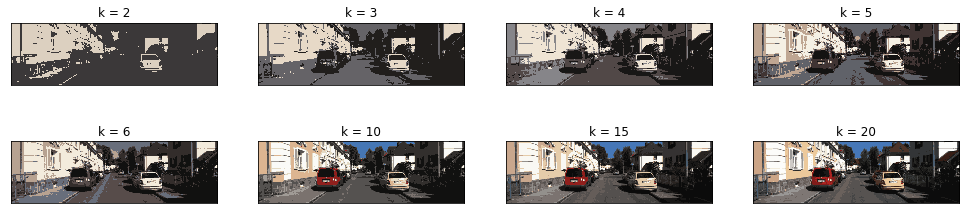

k=2
k=3
k=4
k=5
k=6
k=10
k=15
k=20


In [ ]:
for path in ["./data/bird.jpg", "./data/car.JPG", "./data/holi-festival.jpg"]:

    data_img = load_image(path)
    data = data_img.reshape(-1,3)

    fig, ax = plt.subplots(2,4)
    for ki, k in enumerate([2, 3, 4, 5, 6, 10, 15, 20]):
        print(f"k={k}")
        c_list, centers = k_means(data=data, k=k, number_iterations=10)

        data_img_reconstructed =reconstruct(c_list, centers, data_img.shape)

        ax[int(ki/4)][ki%4].imshow(data_img_reconstructed, interpolation='nearest')
        ax[int(ki/4)][ki%4].title.set_text(f"k = {k}")
        ax[int(ki/4)][ki%4].get_xaxis().set_visible(False)
        ax[int(ki/4)][ki%4].get_yaxis().set_visible(False)

    if path == "./data/car.JPG":
        fig.set_size_inches(17,4)
    else:
        fig.set_size_inches(17,7)
    plt.show()